In [20]:
import pandas as pd 
df = pd.read_csv("Crop_recommendation.csv")

In [21]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,PlantGrown,ReleaseRate,PolymerCombinations
0,24,128,196,22.750888,90.694892,5.521467,110.431786,Rajma,0.040,8.00mL AA+ NR/PVA(8:2)
1,7,144,197,23.849401,94.348150,6.133221,114.051249,Melons,0.003,'6.00mL AA+ NR/PVA(9:1)'
2,14,128,205,22.608010,94.589006,6.226290,116.039659,Rajma,0.060,'6.00mL AA+ NR/PVA(8:2)'
3,8,120,201,21.186674,91.134357,6.321152,122.233323,Sugarcane,0.300,'6.00mL AA+ NR/PVA(6:4)'
4,20,129,201,23.410447,91.699133,5.587906,116.077793,Jute,3.000,'8.00mL AA+ NR/PVA(2:8)'


In [22]:
labels_counts = df['PolymerCombinations '].value_counts()

In [23]:
len(labels_counts)

17

In [24]:
print(df.columns)

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall',
       'PlantGrown', 'ReleaseRate', 'PolymerCombinations '],
      dtype='object')


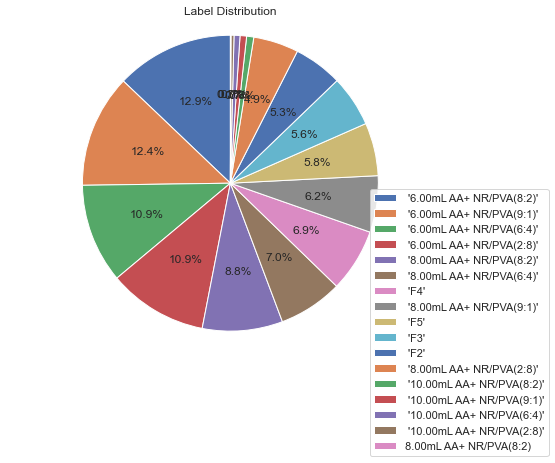

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Crop_recommendation.csv')


label_column = 'PolymerCombinations '

label_counts = df[label_column].value_counts()


plt.figure(figsize=(8, 6))
pie = plt.pie(label_counts, autopct='%1.1f%%', startangle=90)
plt.title('Label Distribution')
plt.legend(pie[0], label_counts.index, loc='best', bbox_to_anchor=(0.8, 0.5))
plt.axis('equal')

plt.show()

In [26]:
df.corr()

,N,P,K,temperature,humidity,ph,rainfall,ReleaseRate
N,1.000000,-0.248393,-0.232652,-0.035999,0.175075,0.125814,0.212690,-0.004890
P,-0.248393,1.000000,0.819044,-0.288726,0.108704,-0.122054,-0.214308,-0.025176
K,-0.232652,0.819044,1.000000,-0.238672,0.259320,-0.195103,0.004653,-0.021846
temperature,-0.035999,-0.288726,-0.238672,1.000000,0.299602,-0.024069,-0.060258,0.037700
humidity,0.175075,0.108704,0.259320,0.299602,1.000000,-0.117918,0.144831,0.023506
ph,0.125814,-0.122054,-0.195103,-0.024069,-0.117918,1.000000,-0.151251,0.039172
rainfall,0.212690,-0.214308,0.004653,-0.060258,0.144831,-0.151251,1.000000,-0.022503
ReleaseRate,-0.004890,-0.025176,-0.021846,0.037700,0.023506,0.039172,-0.022503,1.000000


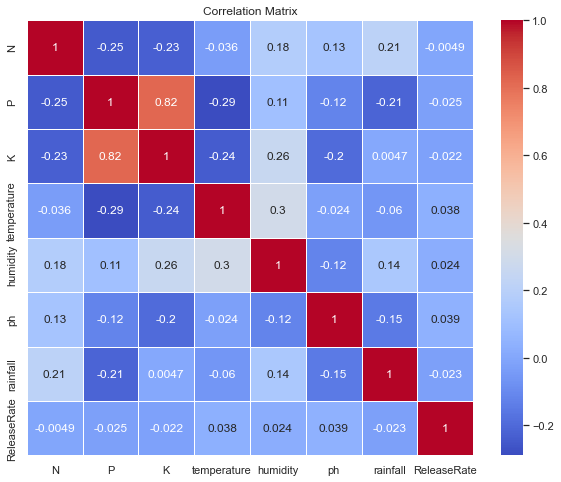

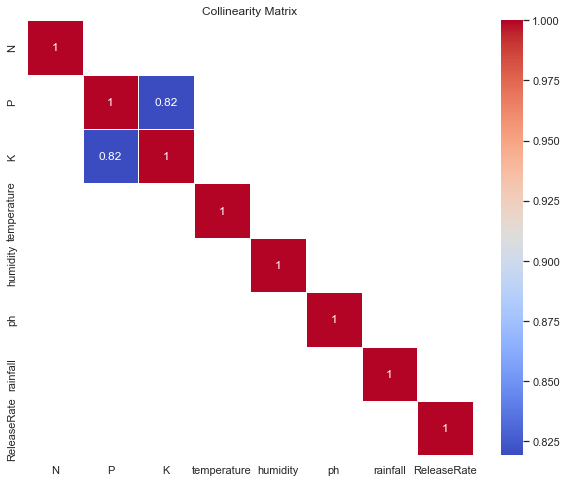

In [27]:
import seaborn as sns
import pandas as pd


df = pd.read_csv('Crop_recommendation.csv')


corr_matrix = df.corr()


sns.set(style='white')
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')


plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix.abs(), annot=True, cmap='coolwarm', mask=corr_matrix.abs() < 0.7, linewidths=0.5)
plt.title('Collinearity Matrix')

plt.show()

C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


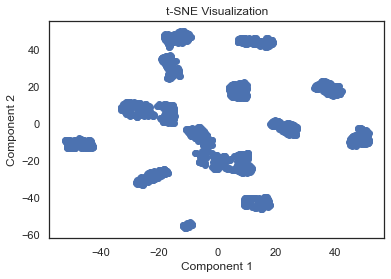

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import OneHotEncoder

# Read the data into a pandas DataFrame
df = pd.read_csv("Crop_recommendation.csv")  # Replace with the path to your data file

# Separate numerical and categorical columns
numeric_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(include=["object"]).columns

# Perform one-hot encoding for categorical columns
encoder = OneHotEncoder(sparse=False, handle_unknown="ignore")
encoded_cats = encoder.fit_transform(df[categorical_cols])

# Concatenate the numerical and encoded categorical columns
features = np.hstack((df[numeric_cols].values, encoded_cats))

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2)
embedded_data = tsne.fit_transform(features)

# Create a new DataFrame with the embedded data
embedded_df = pd.DataFrame(embedded_data, columns=["Component 1", "Component 2"])

# Plot the embedded data
plt.scatter(embedded_df["Component 1"], embedded_df["Component 2"])
plt.title("t-SNE Visualization")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()


C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


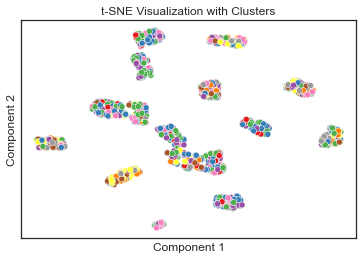

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns


df = pd.read_csv("Crop_recommendation.csv")  


numeric_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(include=["object"]).columns


encoder = OneHotEncoder(sparse=False, handle_unknown="ignore")
encoded_cats = encoder.fit_transform(df[categorical_cols])

features = np.hstack((df[numeric_cols].values, encoded_cats))


tsne = TSNE(n_components=2)
embedded_data = tsne.fit_transform(features)


embedded_df = pd.DataFrame(embedded_data, columns=["Component 1", "Component 2"])


embedded_df["PolymerCombinations "] = df["PolymerCombinations "]


sns.scatterplot(data=embedded_df, x="Component 1", y="Component 2", hue="PolymerCombinations ",palette='Set1',legend=False)
plt.title("t-SNE Visualization with Clusters")

plt.yticks([]) 
plt.xticks([])

plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

In [30]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()

df['Encoded_Label'] = label_encoder.fit_transform(df['PolymerCombinations '])


print(df['Encoded_Label'])


0       16
1        7
2        6
3        5
4        8
        ..
1533     4
1534     5
1535     4
1536     4
1537     4
Name: Encoded_Label, Length: 1538, dtype: int32


In [33]:
df.Encoded_Label.items

<bound method Series.items of 0       16
1        7
2        6
3        5
4        8
        ..
1533     4
1534     5
1535     4
1536     4
1537     4
Name: Encoded_Label, Length: 1538, dtype: int32>

In [38]:
list(label_encoder.inverse_transform([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]))

[" '10.00mL AA+ NR/PVA(2:8)'",
 " '10.00mL AA+ NR/PVA(6:4)'",
 " '10.00mL AA+ NR/PVA(8:2)'",
 " '10.00mL AA+ NR/PVA(9:1)'",
 " '6.00mL AA+ NR/PVA(2:8)'",
 " '6.00mL AA+ NR/PVA(6:4)'",
 " '6.00mL AA+ NR/PVA(8:2)'",
 " '6.00mL AA+ NR/PVA(9:1)'",
 " '8.00mL AA+ NR/PVA(2:8)'",
 " '8.00mL AA+ NR/PVA(6:4)'",
 " '8.00mL AA+ NR/PVA(8:2)'",
 " '8.00mL AA+ NR/PVA(9:1)'",
 " 'F2'",
 " 'F3'",
 " 'F4'",
 " 'F5'"]

In [ ]:
ff = 

In [13]:
df = df.drop('PlantGrown', axis=1)


In [14]:
df = df.drop("PolymerCombinations ",axis=1)

In [15]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X = df.drop(['Encoded_Label'], axis=1) 
y = df['Encoded_Label'] 


In [ ]:
X

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)



In [18]:
X_train

,N,P,K,temperature,humidity,ph,rainfall,ReleaseRate
5,32,137,204,22.860066,93.128599,5.824152,117.729673,0.800
1471,37,50,23,29.652969,88.485874,6.530471,56.019132,0.009
547,97,29,27,27.745770,54.369761,7.205079,139.861943,0.030
780,33,120,205,35.121583,82.268908,5.550832,69.715185,0.600
39,28,123,202,22.766430,92.124385,6.442289,120.435995,4.000
...,...,...,...,...,...,...,...,...
1130,87,35,25,21.445269,63.162155,6.178056,65.889512,4.000
1294,40,24,25,28.705952,50.440301,5.445008,95.894644,0.300
860,79,45,43,25.719013,79.155324,7.171054,187.173542,0.001
1459,36,38,15,28.363639,87.598107,6.320662,57.995244,7.000


In [17]:

xgb_model = xgb.XGBClassifier()


xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9853896103896104


In [16]:
from sklearn.metrics import f1_score, precision_score, recall_score



# Compute macro-average F1 score
f1_macro = f1_score(y_test, y_pred, average='macro')

# Compute macro-average precision
precision_macro = precision_score(y_test, y_pred, average='macro')

# Compute macro-average recall
recall_macro = recall_score(y_test, y_pred, average='macro')

print('Macro-average F1 score:', f1_macro)
print('Macro-average Precision:', precision_macro)
print('Macro-average Recall:', recall_macro)

Macro-average F1 score: 0.8762136461867108
Macro-average Precision: 0.8782551716858993
Macro-average Recall: 0.8775216983345062


/home/rudransh/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.60      0.43      0.50         7
           2       0.50      0.67      0.57         6
           3       1.00      1.00      1.00         5
           4       0.98      1.00      0.99        65
           5       1.00      1.00      1.00        67
           6       0.99      1.00      0.99        75
           7       1.00      1.00      1.00        70
           8       1.00      0.97      0.98        29
           9       1.00      1.00      1.00        38
          10       0.98      1.00      0.99        50
          11       1.00      1.00      1.00        49
          12       1.00      1.00      1.00        32
          13       1.00      1.00      1.00        37
          14       1.00      0.98      0.99        49
          15       1.00      1.00      1.00        36

    accuracy                           0.99       616
   macro avg       0.88   

/home/rudransh/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rudransh/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rudransh/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


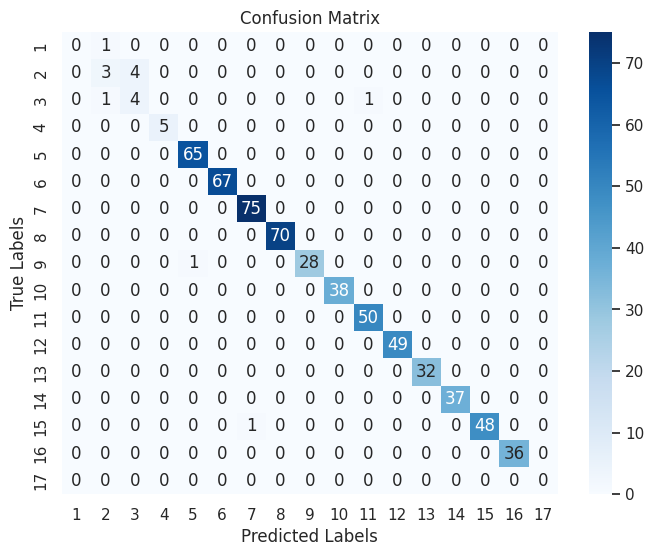

In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Example ground truth values and predicted labels
ground_truth = [0, 1, 2, 1, 0, 2, 2, 0, 1, 2]
predicted_labels = [0, 1, 2, 1, 0, 1, 2, 0, 2, 2]

# Create a confusion matrix
confusion_matrix = np.zeros((17, 17))  # Assuming 3 classes
for true, pred in zip(y_test, y_pred):
    confusion_matrix[true][pred] += 1

# Plot the confusion matrix using seaborn
class_names = ['1',"2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17"]  # Replace with your class names
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [21]:
import pickle
file_name = "xgb_classification.pkl"

# save
pickle.dump(xgb_model, open(file_name, "wb"))